# Unsupervised Learning Techniques

**Clustering**: to group similar instances together into *clusters*. Great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more

**Anomoly Detection**: to learn what "normal" data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series

**Density Estimation**: estimates the *probability density function* (PDF) of the random process that generated the dataset. It is commonly used for anomoly detection: instances located in very low-density regions are likely to be anomolies. It is also useful for data analysis and visualization. 

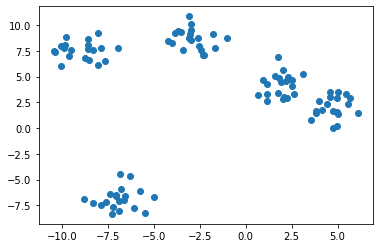

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=5, random_state=42)
plt.scatter(X[:, 0], X[:, 1])

## Clustering

### K-Means

In [14]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

Note you have to specify the number of clusters *k* the algorithm must find. This is not always a simple question.

Each instance is assigned to one of the 5 clusters. In clustering, an instance's *label* is the index of the cluster that this instance gets assigned to by the algorithm: this is not to be confused with the class labels in classification. `KMeans` instance preserves the labels of the instances it was trained on, available via the `labels_` instance variable

In [15]:
y_pred

array([0, 1, 3, 1, 2, 0, 4, 4, 4, 3, 3, 0, 1, 3, 4, 2, 1, 1, 0, 2, 2, 4,
       3, 0, 2, 2, 1, 1, 1, 4, 0, 2, 1, 1, 1, 2, 3, 3, 3, 4, 0, 4, 4, 4,
       2, 3, 3, 0, 2, 1, 1, 4, 4, 0, 4, 2, 1, 1, 3, 3, 4, 3, 2, 0, 2, 0,
       1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 4, 2, 1, 0, 1, 0, 2, 4, 2, 3, 2, 3,
       3, 3, 2, 3, 0, 4, 0, 3, 0, 3, 4, 4], dtype=int32)

In [16]:
y_pred is kmeans.labels_

True

To look at the five centroids the algorithm found: `kmeans.cluster_centers_`

In [17]:
>>> kmeans.cluster_centers_

array([[-6.88732163, -6.84846391],
       [ 1.90144007,  4.22597687],
       [-8.97484095,  7.55134937],
       [-2.87559086,  8.66758942],
       [ 4.73987759,  2.0192694 ]])

Assign new instances to the cluster whose centroid is closest:

In [18]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 4, 1, 1], dtype=int32)

If you plot the cluster's decision boundaries, you get a Voronoi tessellation

Most instances are assigned to the appropriate cluster but a few were probably mislabeled (especially near the decision boundaries). K-Means does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid

Instead of assigning each instance to a single cluster, which is called *hard clustering*, it can be useful to give each instance a score per cluster, which is called *soft clustering*. The score can be the distance between the instance and the centroid; conversely, it can be a similarity score (or affinity), such as the Gaussian Radial Basis Function (chapter 5). In `KMeans`, the `transform()` method measures the distance from each instance to every centroid

In [19]:
>>> kmeans.transform(X_new)

array([[11.21296182,  2.92753264, 10.55297351,  7.26125137,  4.73991676],
       [13.26855089,  2.48229872, 13.19902632,  8.88703081,  1.73998429],
       [10.58789455,  5.05243843,  7.51089246,  5.66895471,  7.80176503],
       [10.12447762,  5.19645176,  7.82399226,  6.16884405,  7.75479252]])

If the dataset is high-dimensional, you can transform it to represent an instance's distance from every centroid. This way you end up with a k-dimensional daatset, an efficient nonlinear dimensionality reduction technique

#### The K-Means algorithm

How does the algorithm work? Place centroids randomly (e.g. picking *k* instances at random and using their locations as centroids). Then label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving. The algorithm is guranteed to converge in a finite number of steps (usually quite small); it will not oscillate forever. 

Although the algorithm is guranteed to converge, it may not converge to the right solution: whether it does or not depends on the centroid initialization. 

Let's look at how to mitigate this risk by improving the centroid initialization

#### Centroid initialization methods

If you happen to know where the centroids should be (e.g if you ran another clustering algorithm earlier), then you can set the `init` hyperparameter to a NumPy array containing the list of centroids, and set `n_init` to 1

In [20]:
good_init = np.array([[-3,3], [-3,2], [-3,1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. The number of random initializations is controlled by the `n_init` hyperparameter: by default it is equal to 10. How does it know which is the best? It uses a performance metric called the model's *inertia*, which is the mean squared distance between each instance and its closest centroid. `KMeans` runs the algorithm `n_init` times and keeps the model with the lowest intertia. 

In [21]:
>>> kmeans.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia_'

Negative inertia

In [ ]:
>>> kmeans.score(X)

NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Introduced a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the K-Means algorithm much less likely to converge to a suboptimal solution (K-Means++).

#### Accelerated K-Means and mini-batch K-Means

Charles Elkan accelerated the algorithm by avoiding many unnecessary distance calculations. He exploited the triangle inequality (i.e that a straight line is always the shortest distance between two points)

Another important variant proposed by David Sculley. Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of 3 or 4 and makes it possible to cluster huge datasets that do not fit in memory.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

Although the Mini-batch K-Means is much faster than the regular version, its inertia is generally slightly worse, especially as the number of clusters increases. 

#### Finding the optimal number of clusters

It is important to choose the right number of clusters for the best model possible. You might be thinking, choose the model with the lowest inertia. Unfortunately, it is not that simple. The inertia is not a good performance metric when trying to choose *k* because it keeps getting lower as we increase *k*. The more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. 

A coarse way of finding the optimal *k* is plotting the inertia as a function of *k*. The inertia will drop quickly as we increase *k* up to a certain value. Then it decreases much more slowly as we keep increasing *k*. The curve creates an arm shape with an "elbow" at a certain k value. If we didn't know better, this would be a good choice: any lower value would be dramatic, while any higher value would not help much.

A more precise approach is to use the *silhouette score*, which is the mean *silhouette coefficient* over all the instances. An instance's silhouette coefficient is equal to (b-a) / max(a,b), where a is the mean distance to the other instances in the same cluster (ie the mean intra-cluster distance) and b is the mean nearest-cluster distance (ie the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and 1. A coefficient close to 1 means the instance is well inside its cluster and far from other clusters, a coefficient of 0 means that it is close to a cluster boundary, while a coefficient of -1 means that the instance may have been assigned to the wrong boundary. 

In [ ]:
>>> from sklearn.metrics import silhouette_score
>>> silhouette_score(X, kmeans.labels_)

0.6944121266631447

A more informative visualization is obtained when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a *silhouette diagram*. Each diagram contains one knife shape per cluster. The shape's height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better). The dashed line indicates the mean silhouette coefficient.

### Limits of K-Means

Despite its many merits, K-Means is not perfect. It is necessary to run the algorithm several times to avoid suboptimal solutions, plus you need to specify the number of clusters. Moreover, it does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes. 

Depending on the data, different clustering algorithms may perform better. E.g on elliptical clusters, Gaussian mixture models work better. 

### Using Clustering for Image Segmentation

*Image Segmentation* is the task of partitioning an image into multiple segments. In *semantic segmentation*, all pixels that are part of the same object type get assigned to the same segment. In *instance segmentation*, all pixels that are part of the same individual object are assigned to the same segment.

Here, we are going to use *color segmentation*. We will simply assign pixels to the same segment if they have a similar color. 

First use Matplotlib's `imread()` function to load the image

In [ ]:
import os
from matplotlib.image import imread
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))
print(image.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'images/unsupervised_learning/ladybug.png'

Image is represented as a 3D array. The first dimension's size is the height; the second is the width; the third is the number of color channels, in this case RGB. For every pixel, there is a 3D vector containing the intensities of red, green, and blue, between 0.0 and 1.0 (or between 0 and 255, if you use `imageio.imread()`). The following reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means:

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

Notice when you use fewer than eight clusters, the ladybug's flashy red color fails to get a cluster of its own: it gets merged with colors from the environment. This is because K-Means prefers clusters of similar sizes.

### Using Clustering for Preprocessing

First load MNIST-like dataset, containing 1797 grayscale 8x8 images representing the digits 0 to 9.

In [ ]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

Split into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

Fit a Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

/Users/arturo/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Evaluate accuracy

In [ ]:
>>> log_reg.score(X_test, y_test)

0.9688888888888889

Let's see if we can do better by using K-Means as a preprocessing step

Create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to these 50 clusters, then apply a Logistic Regression:

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('log_reg', LogisticRegression(random_state=42)),
])

pipeline.fit(X_train, y_train)

/Users/arturo/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(random_state=42))])

Since there are 10 different digits, it's tempting to set the number of clusters to 10. However, each digit can be written several different ways, so it is preferable to use a larger number of clusters, such as 50. 

Evalutate the classification pipeline

In [ ]:
>>> pipeline.score(X_test, y_test)

0.9666666666666667

The clustering step reduces the dataset's dimensionality (from 64 to 50 dimensions), but the performance boost comes mostly from the fact that the transformed dataset is closer to being linearly separable than the original dataset, and therefore it is much easier to tackle with Logistic Regression.

We chose the number of clusters *k* arbitrarily, but we can do better by using `GridSearchCV`

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3)
grid_clf.fit(X_train, y_train)

/Users/arturo/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arturo/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)})

Best value of *k* and the performance of the resulting pipeline

In [ ]:
>>> grid_clf.best_params_

{'kmeans__n_clusters': 63}

In [ ]:
>>> grid_clf.score(X_test, y_test)

0.9577777777777777

### Using Clustering for Semi-Supervised Learning

Another case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances. Train a Logistic Regression model on a sample of 50 labeled instances from the digits dataset:

In [ ]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

/Users/arturo/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Performance of the model on the test set

In [ ]:
>>> log_reg.score(X_test, y_test)

0.7822222222222223

Lower accuracy than before, should come as no surprise. To do better, first cluster the training set into 50 clusters. Then for each cluster, let's find the image closest to the centroid. We will call these images the *representative images*:

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

Let's look at each image and manually label them:

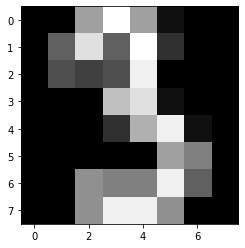

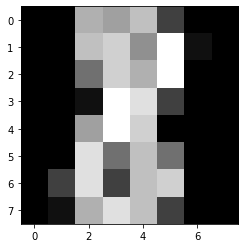

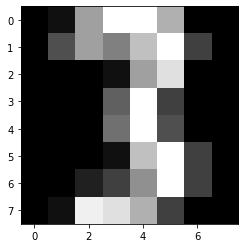

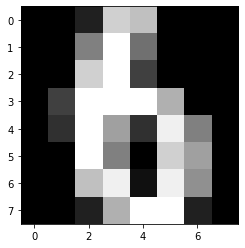

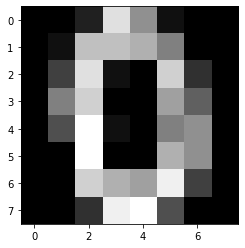

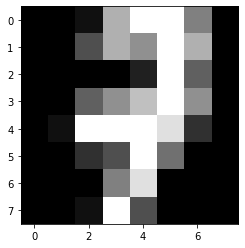

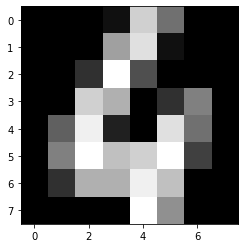

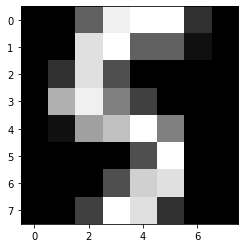

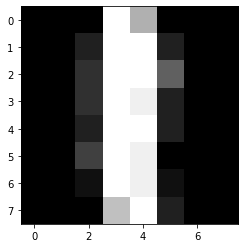

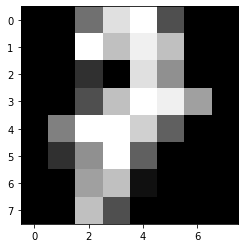

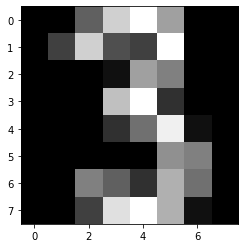

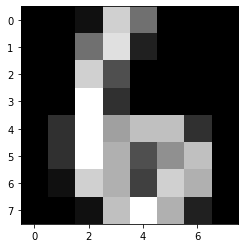

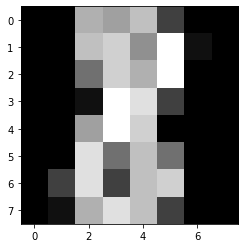

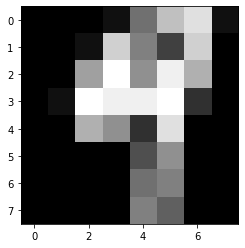

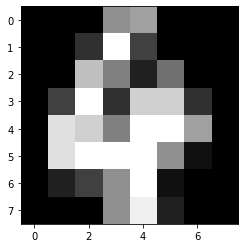

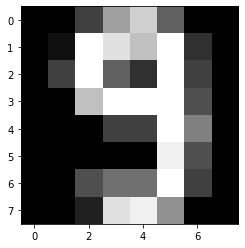

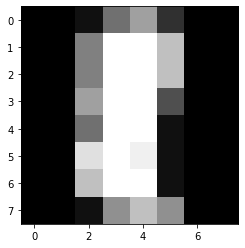

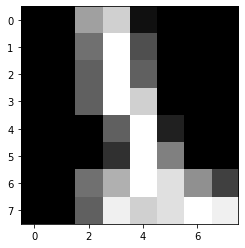

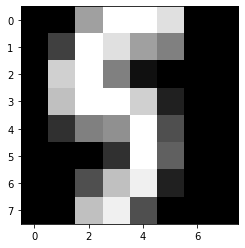

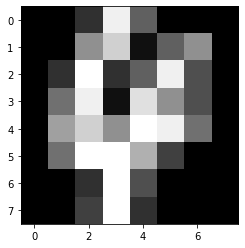

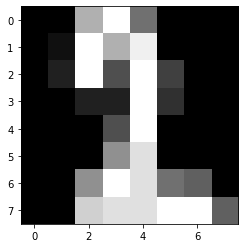

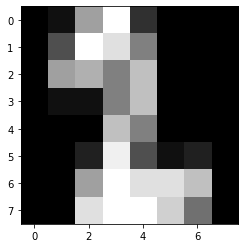

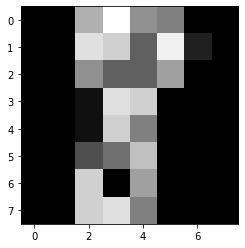

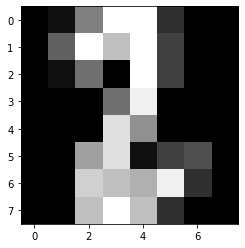

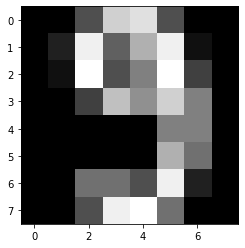

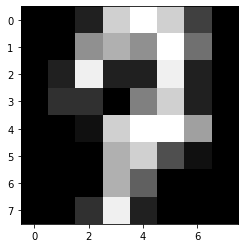

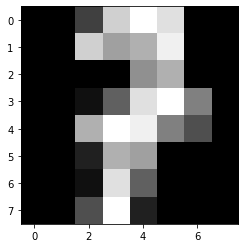

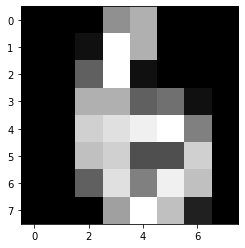

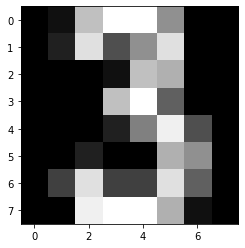

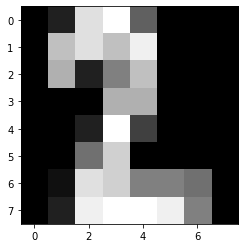

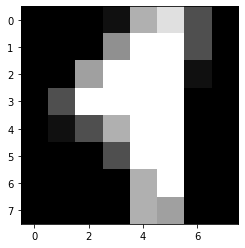

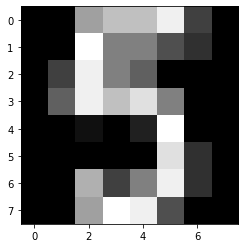

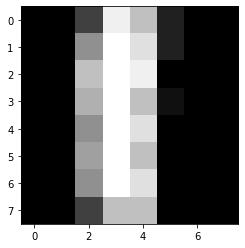

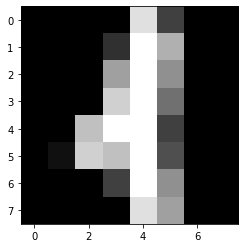

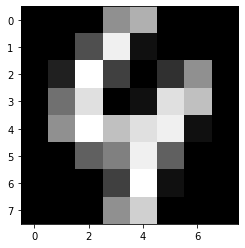

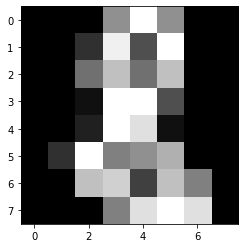

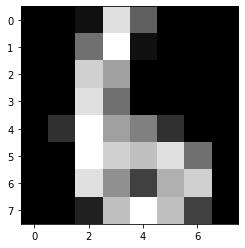

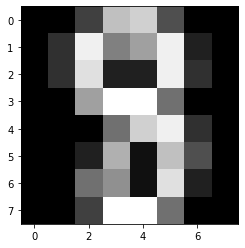

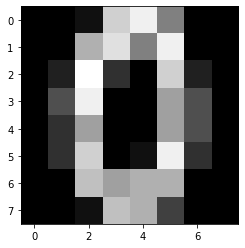

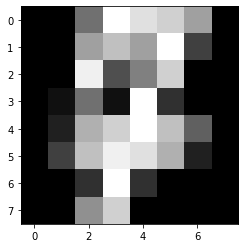

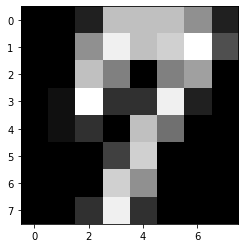

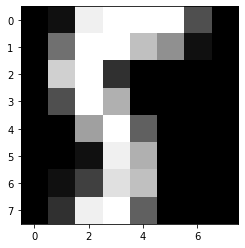

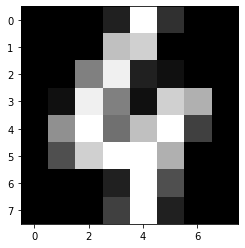

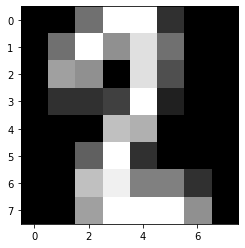

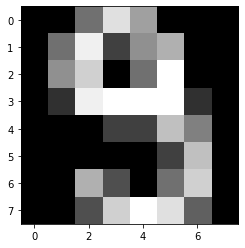

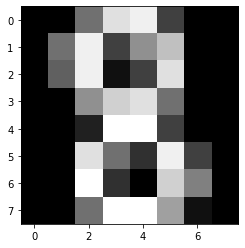

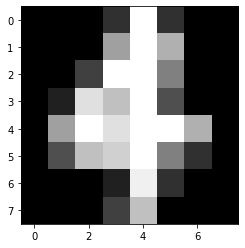

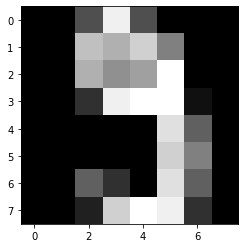

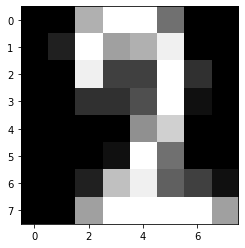

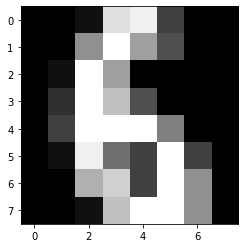

In [ ]:
for digit in X_representative_digits:
    pixels = digit.reshape((8,8))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [ ]:
y_representative_digits = np.array([0, 2, 4, 8, 8, 7, 6, 5, 0, 3, 3, 7, 5, 6, 6, 3, 2, 6, 0, 1, 5, 6, 4, 4, 9, 1, 1, 7, 1, 9, 5, 4, 7, 3, 7, 6, 9, 5, 8, 1, 7, 7, 1, 4, 3, 9, 9, 1, 1, 1])
print(len(y_representative_digits))

50


Now we have a dataset with just 50 labeled instances, but instead of being random instances, each of them is a representative image of its cluster.

In [ ]:
>>> log_reg = LogisticRegression()
>>> log_reg.fit(X_representative_digits, y_representative_digits)
>>> log_reg.score(X_test, y_test)

/Users/arturo/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.10222222222222223

Since it is often costly and painful to label instances, it is a good idea to label representative instances rather than just random instances.

Let's go one step further: what if we propogated the labels to all the other instances in the same cluster? This is called *label propogation*

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

Train the model again and check the performance

In [ ]:
>>> log_reg = LogisticRegression()
>>> log_reg.fit(X_train, y_train_propagated)
>>> log_reg.score(X_test, y_test)

/Users/arturo/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.10444444444444445

We get an accuracy boost but nothing astounding. The problem is we propagated each representative instance's label to all the instances in the same cluster, including the instances located close to the cluster boundaries, which are more likely to be mislabeled. Let's see what happens if we only propagate the labels to the 20% of the instances that are closest to the centroids:

In [ ]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

Train the model again and see the results

In [ ]:
>>> log_reg = LogisticRegression()
>>> log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
>>> log_reg.score(X_test, y_test)

/Users/arturo/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.12

This good performance is due to the fact that the propagated labels are actually pretty good - their accuracy is very high as the following code shows:

In [ ]:
>>> np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.09688581314878893

#### Active Learning

To continue improving model, use *active learning*. When a human expert interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them. There are many stategies for active learning, but one of the most common is called *uncertainty sampling*. How it works:

1. The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances. 
2. The instances for which the model is most uncertain (ie when its estimated probability is lowest) are given to the expert to be labeled. 
3. You iterate this process until the performance improvement stops being worth the labeling effort. 

Other strategies include labeling instances that would result in the largest model change, or the largest drop in the model's validation error, or the instances that different models disagree on (eg an SVM or Random Forest)

## DBSCAN

Based on local density estimation. This approach allows the algorithm to identify clusters of arbitrary shapes

- For each instance, the algorithm counts how many instances aer located within a small distance $\epsilon$ (epsilon) from it. This reagion is called the instance's $\epsilon$-neighborhood
- If an instance has at least `min_samples` instances in its $\epsilon$-neighborhood (including itself), then it is considered a *core instance*. In other words, core instances are those that are located in dense regions. 
- All instances in the neighborhood of a core instance belond to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighoring core instances form a single cluster. 
- Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

Works well if all the clusters are dense enough and if they are well separated by low-density regions. 

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
>>> dbscan.labels_

array([-1,  0,  1,  2,  3,  4,  3,  3,  5,  1,  4,  5,  6,  6,  3,  0,  4,
       -1,  3,  3,  3,  3, -1,  4,  3,  3,  7,  1,  3,  5,  3,  5,  5,  1,
        2,  4,  8,  5,  3,  3,  5,  2,  4, -1,  7,  1, -1,  1,  2,  3,  5,
        8,  3,  3, -1,  1,  2,  2,  1,  6,  5,  9,  8,  1,  4,  3,  5,  3,
        3,  8,  3, -1,  5,  4,  1,  3,  1,  1,  6,  5,  4,  1,  7, -1,  4,
        1,  7,  3,  2,  2,  7,  1,  4,  1,  2,  3,  3,  2,  5,  5,  5,  1,
        6,  4,  1,  2,  1,  3,  5,  3, -1,  5,  4,  4,  3,  5,  1,  1,  5,
        3,  1,  1,  4,  1,  5,  7,  7,  3, -1,  1, -1, -1,  1,  5,  5,  7,
        4,  3,  4,  0,  1, -1,  5,  2,  1,  5,  1,  3,  1,  0,  4,  4,  3,
        6,  5,  4,  4,  1,  2,  5,  4,  4,  4,  4,  8,  4,  5,  7, 10,  1,
        7,  0,  4,  5,  5,  1,  3,  9,  3,  1,  5,  4,  4,  3,  1,  7,  7,
        3,  3, 10,  9,  3,  2,  4,  6,  5,  5,  3,  5,  1,  3,  1, -1,  1,
        5,  1,  3, -1,  8,  1,  1, 10, -1,  2,  3,  3, -1,  3,  5,  4,  1,
       -1,  3,  5,  1,  3

Notice some instances have a cluster index equal to -1, which means they are considered as anomalies by the algorithm. Indices of the core instances are available in the `core_sample_indices_` instance variable, and the core instances are available in the `components_` instance variable

In [ ]:
>>> len(dbscan.core_sample_indices_)

795

In [ ]:
>>> dbscan.core_sample_indices_

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  18,  19,  20,  21,  23,  24,  25,  26,  27,  28,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  44,  45,  47,
        48,  49,  50,  51,  52,  53,  55,  57,  58,  60,  61,  62,  64,
        65,  67,  68,  69,  70,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  84,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  99, 100, 101, 102, 103, 105, 107, 108, 109, 112,
       114, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 142, 144, 145, 146, 147, 148,
       149, 151, 152, 153, 154, 155, 156, 157, 160, 161, 163, 164, 165,
       166, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 190, 191, 192, 193, 194, 196, 197, 198,
       199, 200, 201, 203, 204, 205, 206, 208, 209, 210, 211, 213, 214,
       215, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 22

In [ ]:
>>> dbscan.components_

array([[-0.92759258,  0.06748026],
       [ 0.58541868,  0.86159082],
       [ 1.96479689,  0.29199434],
       ...,
       [ 1.82852218,  0.06416309],
       [-0.06689936,  0.47060531],
       [ 0.86892174, -0.54701068]])

The DBSCAN class does not have a `predict()` method, although it has a `fit_predict()` method. In other words, it cannot predict which cluster a new instance belongs to. This implementation decision was made because different classification algorithms can be better for different tasks, so the authors decided to let the user choose which one to use. It also isn't hard to implement. Let's try using a `KNeighborsClassifier`:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

Given a few new instances, we can predict which cluster they most likely belond to and even estimate a probability for each cluster:

In [ ]:
>>> X_new = np.array([[0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [ ]:
>>> knn.predict(X_new)

array([4, 4, 1, 2])

In [ ]:
>>> knn.predict_proba(X_new)

array([[0.  , 0.  , 0.  , 0.  , 0.98, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.68, 0.  , 0.  , 0.  , 0.  , 0.32, 0.  ],
       [0.  , 0.66, 0.  , 0.  , 0.  , 0.34, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.78, 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.  , 0.16]])

Note we trained the classifier using only the core instances, but we could also have chosen to train it on all the instances, or all but the anomalies: this choice depends on the final task

Notice there is no anomaly in the training set, the classifier always chooses a cluster, even when that cluster is far away. To introduce a max distance, in which case far away instances are classified as anomalies, use the `kneighbors()` method. Given a set of instances, it returns the distances and the indices of the *k* nearest neighbors in the training set (two matrices, each with *k* columns)

In [ ]:
>>> y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
>>> y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
>>> y_pred[y_dist > 0.2] = -1
>>> y_pred.ravel()

array([-1,  9,  1, -1])

DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of any shape. It is robust to outliers and has only 2 hyperparameters (`eps` and `min_samples`). If the density varies significantly across the clusters, however, it can be impossible for it to capture all the clusters properly.

Computational Complexity: $O(mlogm)$
<br>
Pretty close to linear with regard to the number of instances, but Scikit-Learn's implementation can require up to $O(m^{2})$ if `eps` is large

## Other Clustering Algorithms

- Agglomerative clustering
- BIRCH
- Mean-Shift
- Affinity propagation
- Spectral clustering

## Gaussian Mixtures

A *Gaussian Mixture model* (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. 

For the simplest GMM variant, you must know in advance the number *k* of Gaussian distributions. Start by estimating the weights and distribution parameters:

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [ ]:
>>> gm.weights_

array([0.5842284 , 0.20667369, 0.20909791])

In [ ]:
>>> gm.means_

array([[ 0.49523437,  0.25197947],
       [-0.73173117,  0.5622695 ],
       [ 1.7260426 , -0.06723781]])

In [ ]:
>>> gm.covariances_

array([[[ 0.16568314, -0.09862704],
        [-0.09862704,  0.28909775]],

       [[ 0.05328688,  0.06246021],
        [ 0.06246021,  0.08917966]],

       [[ 0.05871116,  0.06689212],
        [ 0.06689212,  0.09430112]]])

GMM relies on *Expectation Maximization* (EM), which has many similarities with K-Means: it also initializes the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters (called *expectation step*) and then updating the clusters (called *maximization step*). Think of EM as a generalization of K-Means that not only finds the cluster centers ($\mu$, cluster means), but also their size, shape, and orientation ($\sum$, covariance matrix), as well as their relative weights ($\phi$).

Unlike K-Means, EM uses soft cluster assignmens, not hard assignments. For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters). then, during the maximization step, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. These probabilities are called the *responsibilities* of the clusters for the instances. 

In [ ]:
>>> gm.converged_

True

In [ ]:
>>> gm.n_iter_

15

In [ ]:
>>> gm.predict(X)

array([1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0,
       2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1,
       2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0,
       0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0,
       1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2,

In [ ]:
>>> gm.predict_proba(X)

array([[7.01204729e-003, 9.92987953e-001, 1.08171865e-139],
       [1.20687189e-003, 9.98793128e-001, 1.95269188e-145],
       [1.00000000e+000, 4.61883264e-028, 2.14579998e-064],
       ...,
       [1.08037063e-003, 7.23769887e-194, 9.98919629e-001],
       [1.00000000e+000, 4.83257740e-012, 8.32878183e-092],
       [9.99985940e-001, 1.63463342e-131, 1.40599608e-005]])

GMM is a *generative model*, meaning you can sample new instances from it

In [ ]:
>>> X_new, y_new = gm.sample(6)
>>> X_new

array([[ 0.71680879, -0.53474278],
       [ 0.26289722,  1.10515719],
       [ 0.57313495,  0.85524379],
       [ 0.26503395,  0.09615884],
       [-0.54078828,  0.8141748 ],
       [ 1.55583859, -0.5117688 ]])

In [ ]:
>>> y_new

array([0, 0, 0, 0, 1, 2])

Estimate the density of the model at any given location (estimates the *probability density function* - PDF). The greater the score the higher the density:

In [ ]:
>>> gm.score_samples(X)

array([-3.21062631e+00, -2.44115671e+00, -1.72187842e+00, -6.74483536e-01,
       -4.06546734e-01, -1.46849754e+00, -3.10792498e-01, -7.51859234e-01,
       -1.92859609e+00, -1.72147820e+00, -1.62118842e+00, -2.38227178e-01,
       -1.84106829e+00, -1.75902273e+00, -2.54955541e-01, -8.39352938e-01,
       -1.74117138e+00, -3.53646824e-01, -1.27887728e+00, -1.00708208e+00,
       -1.22244691e-01, -6.86375826e-01, -2.07861271e+00, -1.61179832e+00,
       -9.92468113e-02, -1.48957530e+00, -5.03784761e-01, -1.35700567e+00,
       -4.23930287e-01, -1.87014648e+00, -1.74546965e+00, -1.53316584e+00,
       -1.75208518e+00, -1.68283127e+00, -4.45934841e-01, -1.80516823e+00,
       -2.13818980e+00, -5.96738431e-01, -1.39471689e+00, -2.18474992e+00,
       -2.11570686e+00, -7.07973544e-01, -1.36396987e+00, -1.28823774e+00,
       -6.84523154e-01, -1.65253515e+00, -1.37590273e+00, -1.59596058e+00,
       -8.34880010e-01, -7.86843006e-01, -1.91994558e+00, -1.84892372e+00,
       -5.10261787e-02,  

When there are many dimensions, many clusters, or few instances, EM can struggle to converge to the optimal solution. You might need to reduce teh difficulty of the task by limiting the number of parameters that the algorithm has to learn. One way to do this is to limit the range of shapes and orientations that the clusters can have. This is achieved by imposing constraints on the covariance matrices. Set the `covariance_type` hyperparameter to one of the following:
- `"spherical"`: all clusters must be spherical but can have different diameters (ie different variances)
- `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the coordinate axes (ie the covariance matrices must be diagonal)
- `"tied"`: all clusters must have the same ellipsoidal shape, size, and orientation (ie all clusters share the same covariance matrix)

By default, `covariance_type` is set to `"full"`: each cluster can take on any shape, size and orientation

Computational complexity of `GaussianMixture` depends on the number of instances *m*, number of dimensions *n*, number of clusters *k*, and constraints on the covariance matrices. 
- spherical or diag: $O(kmn)$, assuming data has a clustering structure
- tied or full: $O(kmn^{2}+kn^{3}), so it will not scale to large number of features

### Anomaly Detection using Gaussian Mixtures

*Anomaly detection* (*outlier detection*) is the task of detecting instances that deviate strongly from the norm. These instances are called *anomalies*, or *outliers*, while normal instances are called *inliers*. 

Using GMM for anomaly detection is simple: any instance located in a low-density region can be considered an anomaly. Define what threshold you want to use which can be decreased if too many false positives (ie perfectly good products taht are flagged as defective), and increased if too many false negatives (ie defective products that the system does not flag as defective). This is the usual precision/recall trade-off. 

Identify the outliers using the fourth percentile lowest density as the threshold (ie approximately 4% of the instances will be flagged as anomalies):

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

Closely related *novelty detection*: algorithm is assumed to be trained on a "clean" dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption. Outlier detection is often used to clean up a dataset. 

### Selecting the Number of Clusters

Inertia or silhouette score are not reliable when the clusters are not spherical or have different sizes. Instead, find the model that minimizes a *theoretical information criterion*, such as the *Bayesian information criterion* (BIC) or the *Akaike information criterion* (AIC).

BIC = $log(m)p-2log(\hat{L})$

AIC = $2p-2log(\hat{L})$

- *m*: the number of instances
- *p*: the number of parameters learned by the model
- $\hat{L}$: the maximized value of the *likelihood function* of the model

BIC and AIC penalize models that have more parameters to learn (e.g, more clusters) and reward models that fit the data well

In [ ]:
>>> gm.bic(X)

2785.520212439277

In [ ]:
>>> gm.aic(X)

2702.088372696581

### Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, you can use the `BayesianGaussianMixture` class, which is capable of giving weights equal (or close) to zero to unnecessary clusters. Set the number of clusters `n_components` to a value that you have good reason to believe is greater than the optimal number of clusters

In [ ]:
>>> from sklearn.mixture import BayesianGaussianMixture
>>> bgm = BayesianGaussianMixture(n_components=10, n_init=10)
>>> bgm.fit(X)
>>> np.round(bgm.weights_, 2)

array([0.12, 0.14, 0.16, 0.12, 0.12, 0.09, 0.11, 0.12, 0.  , 0.  ])

Detected the necessary number of clusters and the clusters have almost identical values

### Other Algorithms for Anomaly and Novelty Detection

- PCA
- Fast-MCD (*minimum covariance determinant*)
- Isolation Forest
- Local Outlier Factor (LOF)
- One-class SVM

# Exercises

1. **How would you define clustering? Can you name a few clustering algorithms?**
<br>
An unsupervised learning algorithm that has the task of identifying similar instances and assigning them to clusters, or groups of similar instances. Some clustering algorithms include K-Means, DBSCAN, and Gaussian Mixture Models. 

2. **What are some of the main applications of clustering algorithms?**
<br>
Classification, data analysis, dimensionality reduction, anomaly detection, and many others

3. **Describe two techniques to select the right number of clusters when using K-Means**
<br>
Plot inertia as a function of the number of clusters, Silhouette score

4. **What is label propagation? Why would you implement it, and how?**
<br>
Instances within a certain distance of a centroid can be propogated using the same label. This is useful when very few or no instances are labeled (semi-supervised learning). To implement, first cluster the set into a large number of clusters. We call these representative images. Next we manually label the labels found, but instead of these being random each of them is a representative image of its cluster. Now, when a clustering algorithm is implemented, we can propogate labels to instances that are close to these representative images. 

5. **Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?**
<br>
Scale to large datasets: Mini-batch K-Means, BIRCH
<br>
Look for regions of high density: DBSCAN, Gaussian Mixture Models

6. **Can you think of a use case where active learning would be useful? How would you implement it?**
<br>
Image classification - using the CEAL model
<br>
Object Detection - using the MI-AOD model

7. **What is the difference between anomaly detection and novelty detection?**
<br>
The novelty detection algorithm is assumed to be trained on a "clean" dataset, uncontaminated by oultiers, whereas anomaly detection does not make this assumption.

8. **What is a Gaussian mixture? What tasks can you use it for?**
<br>
GMM is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density, and orientation. When you observe an instance, you know it was generated from one of the Gaussian distributions, but you are not told wich one, and you do not know what parameters of these distributions are. 

9. **Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?**
<br>
BIC or AIC

10. **The classic Olivetti faces dataset contains 400 grayscale 64x64-pixel images of faces. Each image is flattened to a 1D vector of size 4096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?**

Load dataset

In [22]:
from sklearn.datasets import fetch_olivetti_faces


faces = fetch_olivetti_faces()
X, y = faces.data, faces.target


Split into training, validation, and test set (with stratified sampling)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=240)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size=80)
print(len(X_train), len(X_val), len(X_test))

240 80 80


Cluster images using K-Means, making sure you have a good number of clusters

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


def find_best_kmeans(k_range, X):
    best_kmeans = None
    max_score = float('-inf')
    scores = []
    for k in k_range:
        curr = KMeans(n_clusters=k, random_state=42)
        curr.fit(X)
        curr_score = silhouette_score(X, curr.labels_)
        scores.append(curr_score)
        if curr_score > max_score:
            max_score = curr_score
            best_kmeans = curr
     
    plt.plot(k_range, scores)
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.show()

    return best_kmeans



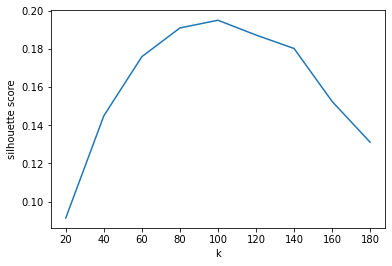

In [25]:
best_kmeans = find_best_kmeans(range(20, 200, 20), X_train)


Using PCA, reduce dimensions of dataset to (400, 2)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(2)

X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.fit_transform(X_val)
X_test_reduced = pca.fit_transform(X_test)
print(X_train_reduced.shape, X_val_reduced.shape, X_test_reduced.shape)

(240, 2) (80, 2) (80, 2)


Create K-Means with 40 clusters (true number of clusters)

In [27]:
true_kmeans = KMeans(n_clusters=40, random_state=42)
true_kmeans.fit(X_train_reduced)

KMeans(n_clusters=40, random_state=42)

Plot predicted labels from X_train and see if clusters exist

In [28]:
import numpy as np

def plot_clusters(kmeans, X):
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    u_labels = np.unique(labels)

    for i in u_labels:
        plt.scatter(X[labels == i, 0], X[labels == i, 1], label = i)
    plt.scatter(centroids[:,0], centroids[:,1], s=30, color='k')
    plt.legend(bbox_to_anchor=(1.15,0.5), loc='right')
    plt.rcParams['figure.figsize'] = [5,5]
    plt.show()

Plot clusters using best kmeans found with silhouette score

In [29]:
best_kmeans.fit(X_train_reduced)

KMeans(n_clusters=100, random_state=42)

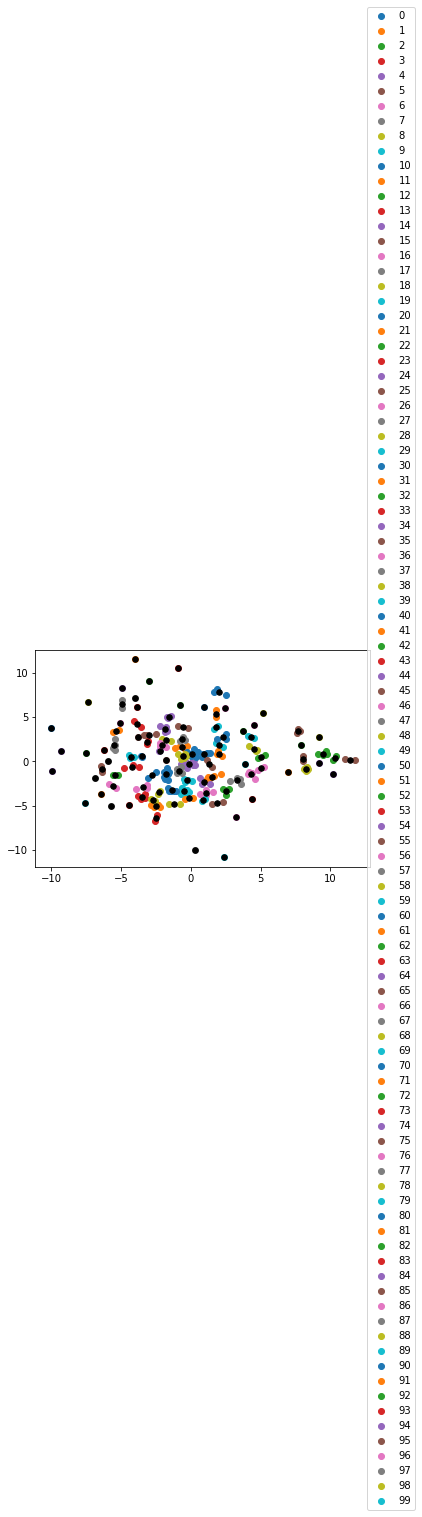

In [30]:
plot_clusters(best_kmeans, X_train_reduced)

Plot clusters for true k value 40

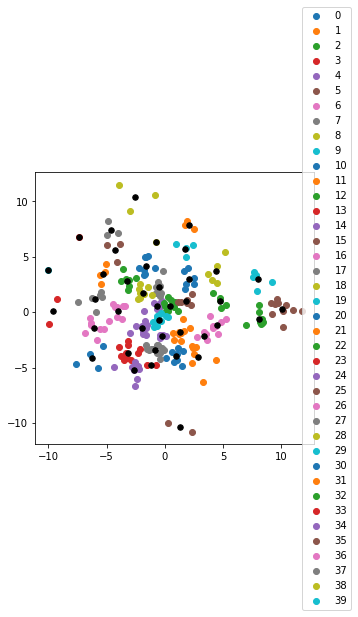

In [31]:
plot_clusters(true_kmeans, X_train_reduced)

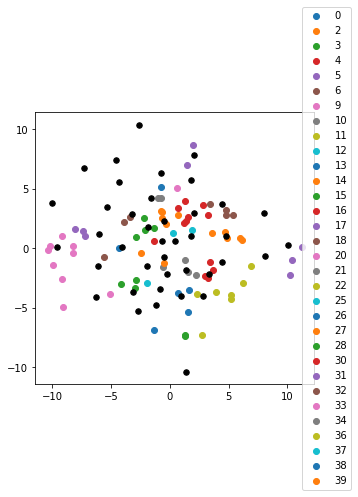

In [32]:
plot_clusters(true_kmeans, X_val_reduced)

11. **Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?**

Train a classifier to predict which person is represented in each picture

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Evaluate it on the validation set

In [34]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_val)
accuracy_score(y_pred, y_val)

0.7125

Use K-Means as a dimensionality reduction tool, and trai

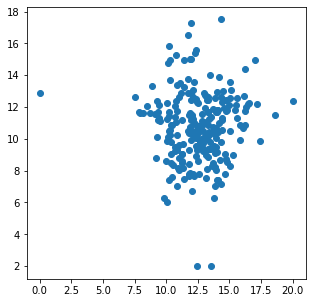

In [35]:
reduced_kmeans = KMeans(n_clusters=100)
reduced_kmeans.fit(X_train)

X_train_kmeans_reduced = reduced_kmeans.transform(X_train)
X_val_kmeans_reduced = reduced_kmeans.transform(X_val)

plt.scatter(X_train_kmeans_reduced[:,0], X_train_kmeans_reduced[:,1])
plt.show()

Train a classifier using the reduced set

In [36]:
knn.fit(X_train_kmeans_reduced, y_train)
accuracy_score(knn.predict(X_val_kmeans_reduced), y_val)

0.475

Append features of reduced set to original set

In [37]:
X_train_combined = np.append(X_train, X_train_kmeans_reduced, axis=1)
X_val_combined = np.append(X_val, X_val_kmeans_reduced, axis=1)

knn.fit(X_train_combined, y_train)
accuracy_score(knn.predict(X_val_combined), y_val)

0.525

12. **Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g, use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the `sample()` method), and visualize them (if you used PCA, you will need to use its `inverse_transform()` method). Try to modify some images (e.g, rotate, flip, darken) and see if the model can detect the anomalies (i.e compare the output of the `score_samples()` method for normal images and for anomalies).**

Reduce dataset dimensionality

In [38]:
faces_pca = PCA(n_components=0.99)
X_reduced = faces_pca.fit_transform(X)

Train GMM on the Olivetti faces dataset

In [39]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture()
gm.fit(X_reduced)

GaussianMixture()

Generate new faces using `sample()` method and visualize them using `inverse_transform()`

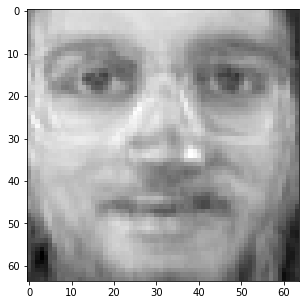

: 

: 

In [40]:
n_samples = 9
samples_reduced = gm.sample(n_samples=n_samples)[0]
samples_inverse = faces_pca.inverse_transform(samples_reduced)

def plot_image(X):
    for img in X:
        pixels = img.reshape((64,64))
        plt.imshow(pixels, cmap='gray')
        plt.show()

plot_image(samples_inverse)

Modify images (rotate, flip, darken)

In [1]:
np.random.seed(42)

random_idx = np.random.choice(400, 3)
images = faces.images[random_idx]
darken = 1.75

print(images.shape)

rota = np.rot90(images, k=1, axes=(1,2))
flip = np.flip(images, 1)

rota = rota.reshape((3,4096))
flip = flip.reshape((3,4096))
dark = X[random_idx] * darken

plot_image(X[random_idx])
plot_image(rota)
plot_image(flip)
plot_image(dark)

NameError: name 'np' is not defined

In [ ]:
rota_reduced = faces_pca.transform(rota)
flip_reduced = faces_pca.transform(flip)
dark_reduced = faces_pca.transform(dark)
print(rota_reduced.shape, flip_reduced.shape, dark_reduced.shape)

(3, 260) (3, 260) (3, 260)


Compare `score_samples()` for modified and unmodified images

In [ ]:
print('Unmodified:', gm.score_samples(X_reduced[random_idx]))
print('Rotated:', gm.score_samples(rota_reduced))
print('Flipped:', gm.score_samples(flip_reduced))
print('Darkened:', gm.score_samples(dark_reduced))

Unmodified: [24.12998379 -2.40541587 31.08330111]
Rotated: [-379.68237356 -252.58371819 -242.80939867]
Flipped: [-385.83273859 -262.3581429  -279.94977267]
Darkened: [-273.94237696 -377.33986979 -267.04767671]


13. **Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exerces, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.**

Compute reconstruction error for each image

In [ ]:
from sklearn.metrics import mean_squared_error
X_preimage = faces_pca.inverse_transform(X_reduced)

In [ ]:
>>> mean_squared_error(X, X_preimage)

0.00019257102

Reconstruction Errors:

In [ ]:
unmodified_preimage = X[random_idx]

Rotated Image

In [ ]:
>>> rota_preimage = faces_pca.inverse_transform(rota_reduced)
>>> mean_squared_error(rota_preimage, unmodified_preimage)

0.051129438

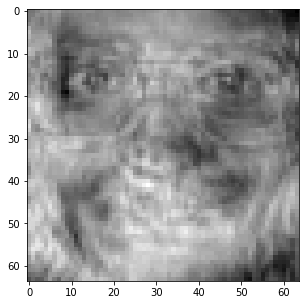

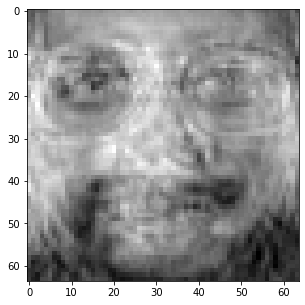

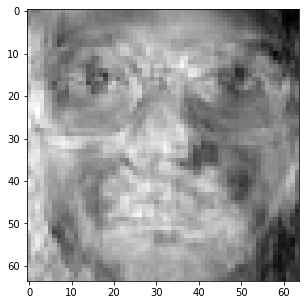

In [ ]:
plot_image(rota_preimage)

Flipped Image

In [ ]:
>>> flip_preimage = faces_pca.inverse_transform(flip_reduced)
>>> mean_squared_error(flip_preimage, unmodified_preimage)

0.041888297

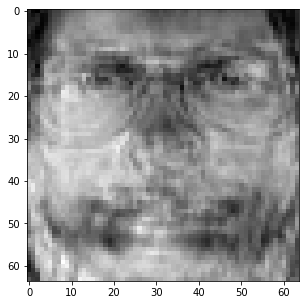

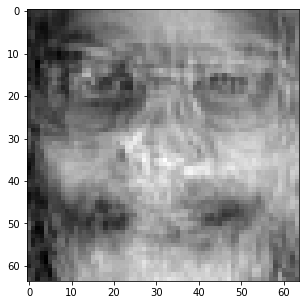

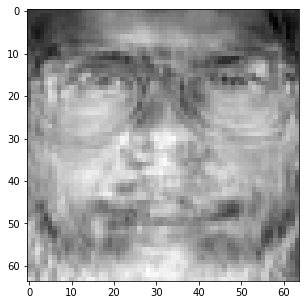

In [ ]:
plot_image(flip_preimage)

Darkened Image

In [ ]:
>>> dark_preimage = faces_pca.inverse_transform(dark_reduced)
>>> mean_squared_error(dark_preimage, unmodified_dark_preimage)

0.24975365

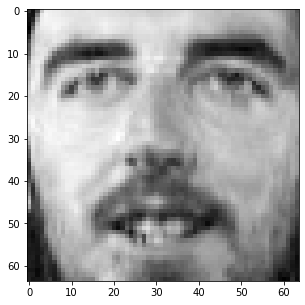

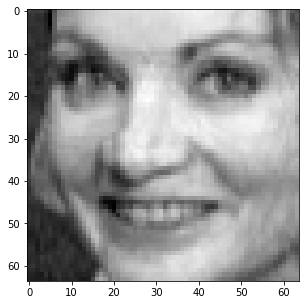

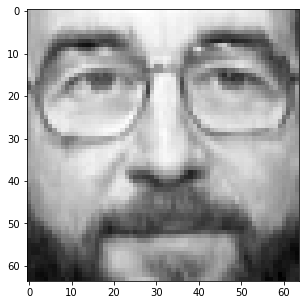

In [ ]:
plot_image(dark_preimage)